## Load and explore data




In [ ]:
import pandas as pd

# Column names from census-income.names
column_names = [
    'Age', 'Work Class', 'fnlwgt', 'Education', 'Education-Num',
    'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
    'Capital Gain', 'Capital Loss', 'Hours per week', 'Native Country', 'Income'
]

# Load the datasets
df_train = pd.read_csv('/content/census-income.data', names=column_names, sep=r',\s*', engine='python')
df_test = pd.read_csv('/content/census-income.test', names=column_names, sep=r',\s*', engine='python', skiprows=1) # Skip the first row

# Concatenate train and test dataframes
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Display initial information
display(df_combined.head())
display(df_combined.info())
display(df_combined.describe())

# Check the distribution of the target variable
display(df_combined['Income'].value_counts())

,Age,Work Class,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299284 entries, 0 to 299283
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Age             299284 non-null  object
 1   Work Class      299284 non-null  object
 2   fnlwgt          299284 non-null  object
 3   Education       299284 non-null  int64 
 4   Education-Num   299284 non-null  object
 5   Marital Status  299284 non-null  object
 6   Occupation      299284 non-null  object
 7   Relationship    299284 non-null  object
 8   Race            299284 non-null  object
 9   Sex             299284 non-null  int64 
 10  Capital Gain    299284 non-null  object
 11  Capital Loss    299284 non-null  int64 
 12  Hours per week  299284 non-null  int64 
 13  Native Country  299284 non-null  int64 
 14  Income          299284 non-null  object
dtypes: int64(5), object(10)
memory usage: 34.3+ MB


None

,Education,Sex,Capital Loss,Hours per week,Native Country
count,299284.000000,299284.000000,299284.000000,299284.000000,299284.000000
mean,1.956165,0.176461,1.516496,23.178412,94.499997
std,2.364858,0.555241,0.850396,24.404048,0.500001
min,0.000000,0.000000,0.000000,0.000000,94.000000
25%,0.000000,0.000000,2.000000,0.000000,94.000000
50%,1.000000,0.000000,2.000000,8.000000,94.000000
75%,4.000000,0.000000,2.000000,52.000000,95.000000
max,6.000000,2.000000,2.000000,52.000000,95.000000


,count
Income,
- 50000.,280716
50000+.,18568


## Data cleaning and preprocessing




In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace '?' with NaN
df_combined.replace('?', np.nan, inplace=True)

# Identify columns with missing values
missing_values = df_combined.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values and their counts:")
print(missing_values)

# Impute missing values
for col in missing_values.index:
    if df_combined[col].dtype == 'object': # Categorical column
        # Impute with mode, handle potential multiple modes
        mode_value = df_combined[col].mode()
        if not mode_value.empty:
            df_combined[col].fillna(mode_value[0], inplace=True)
    else: # Numerical column
        # Impute with median
        median_value = df_combined[col].median()
        df_combined[col].fillna(median_value, inplace=True)

print("\nMissing values after imputation:")
print(df_combined.isnull().sum())

Columns with missing values and their counts:
Age               149641
fnlwgt            149641
Marital Status     10142
Occupation          9191
Relationship        5157
dtype: int64

Missing values after imputation:


/tmp/ipython-input-2-1736125558.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined[col].fillna(mode_value[0], inplace=True)


Age               0
Work Class        0
fnlwgt            0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Native Country    0
Income            0
dtype: int64


In [ ]:
# Identify categorical columns (object dtype)
categorical_cols = df_combined.select_dtypes(include='object').columns.tolist()

# Exclude the target variable from encoding
categorical_cols.remove('Income')

print("Categorical columns to encode:", categorical_cols)

# Apply one-hot encoding
df_combined_encoded = pd.get_dummies(df_combined, columns=categorical_cols, drop_first=True)

display(df_combined_encoded.head())

Categorical columns to encode: ['Age', 'Work Class', 'fnlwgt', 'Education-Num', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Capital Gain']


,Education,Sex,Capital Loss,Hours per week,Native Country,Income,Age_Different county same state,Age_Different state in Midwest,Age_Different state in Northeast,Age_Different state in South,...,Relationship_Trinadad&Tobago,Relationship_United-States,Relationship_Vietnam,Relationship_Yugoslavia,Race_Foreign born- U S citizen by naturalization,Race_Native- Born abroad of American Parent(s),Race_Native- Born in Puerto Rico or U S Outlying,Race_Native- Born in the United States,Capital Gain_Not in universe,Capital Gain_Yes
0,0,0,2,0,95,- 50000.,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,1,0,2,52,94,- 50000.,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,0,0,2,0,95,- 50000.,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0,0,0,0,94,- 50000.,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
4,0,0,0,0,94,- 50000.,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_combined_encoded.drop('Income', axis=1)
y = df_combined_encoded['Income']

# Convert the target variable to numerical (0 for -50000, 1 for 50000+)
y = y.map({'- 50000.': 0, '50000+.': 1})

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nDistribution of target in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (239427, 150)
Shape of X_test: (59857, 150)
Shape of y_train: (239427,)
Shape of y_test: (59857,)

Distribution of target in y_train:
Income
0    0.93796
1    0.06204
Name: proportion, dtype: float64

Distribution of target in y_test:
Income
0    0.937952
1    0.062048
Name: proportion, dtype: float64


## Exploratory data analysis (eda) and visualization




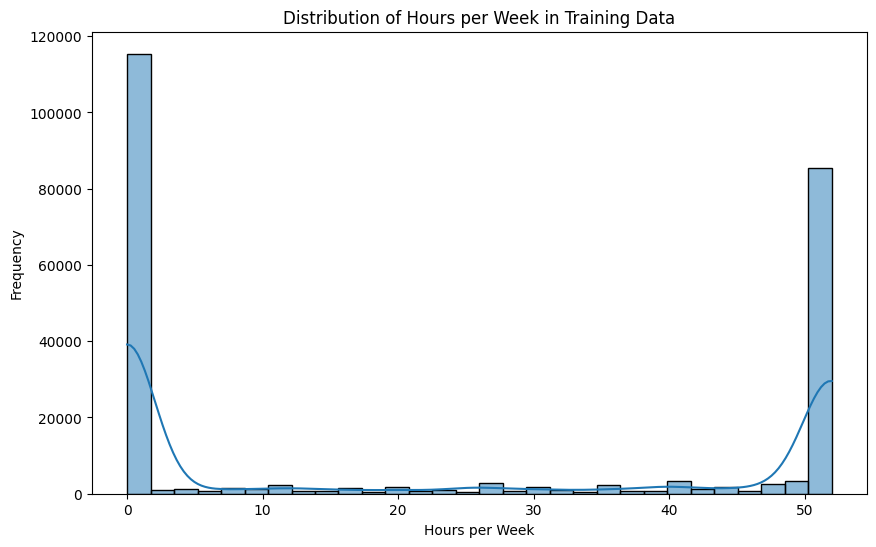

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(X_train['Hours per week'], bins=30, kde=True)
plt.title('Distribution of Hours per Week in Training Data')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

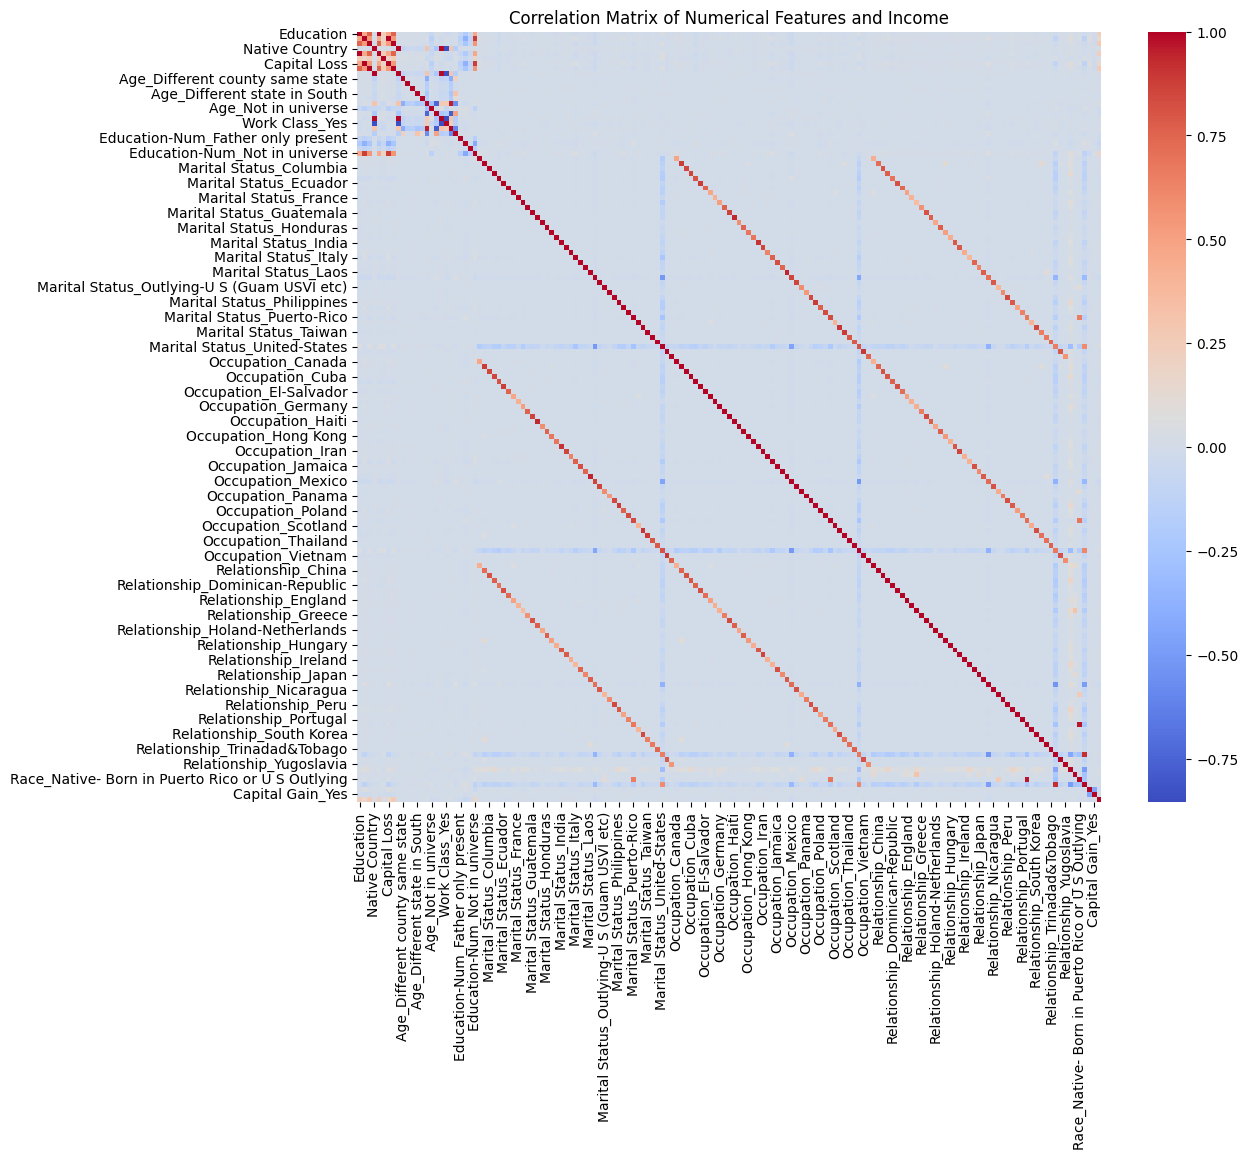

In [ ]:
# Include the target variable in the correlation matrix for visualization
X_train_with_target = X_train.copy()
X_train_with_target['Income'] = y_train

# Select numerical columns for the heatmap
numerical_cols_for_corr = ['Education', 'Capital Loss', 'Hours per week', 'Native Country'] + [col for col in X_train.columns if X_train[col].dtype in ['bool', 'int64', 'float64'] and '?' not in col] + ['Income']

# Calculate the correlation matrix
correlation_matrix = X_train_with_target[numerical_cols_for_corr].corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Income')
plt.show()

In [ ]:
print(df_combined_encoded.columns.tolist())

['Education', 'Sex', 'Capital Loss', 'Hours per week', 'Native Country', 'Income', 'Age_Different county same state', 'Age_Different state in Midwest', 'Age_Different state in Northeast', 'Age_Different state in South', 'Age_Different state in West', 'Age_Nonmover', 'Age_Not in universe', 'Age_Same county', 'Work Class_Not in universe under 1 year old', 'Work Class_Yes', 'fnlwgt_Not in universe', 'fnlwgt_Yes', 'Education-Num_Father only present', 'Education-Num_Mother only present', 'Education-Num_Neither parent present', 'Education-Num_Not in universe', 'Marital Status_Canada', 'Marital Status_China', 'Marital Status_Columbia', 'Marital Status_Cuba', 'Marital Status_Dominican-Republic', 'Marital Status_Ecuador', 'Marital Status_El-Salvador', 'Marital Status_England', 'Marital Status_France', 'Marital Status_Germany', 'Marital Status_Greece', 'Marital Status_Guatemala', 'Marital Status_Haiti', 'Marital Status_Holand-Netherlands', 'Marital Status_Honduras', 'Marital Status_Hong Kong', '

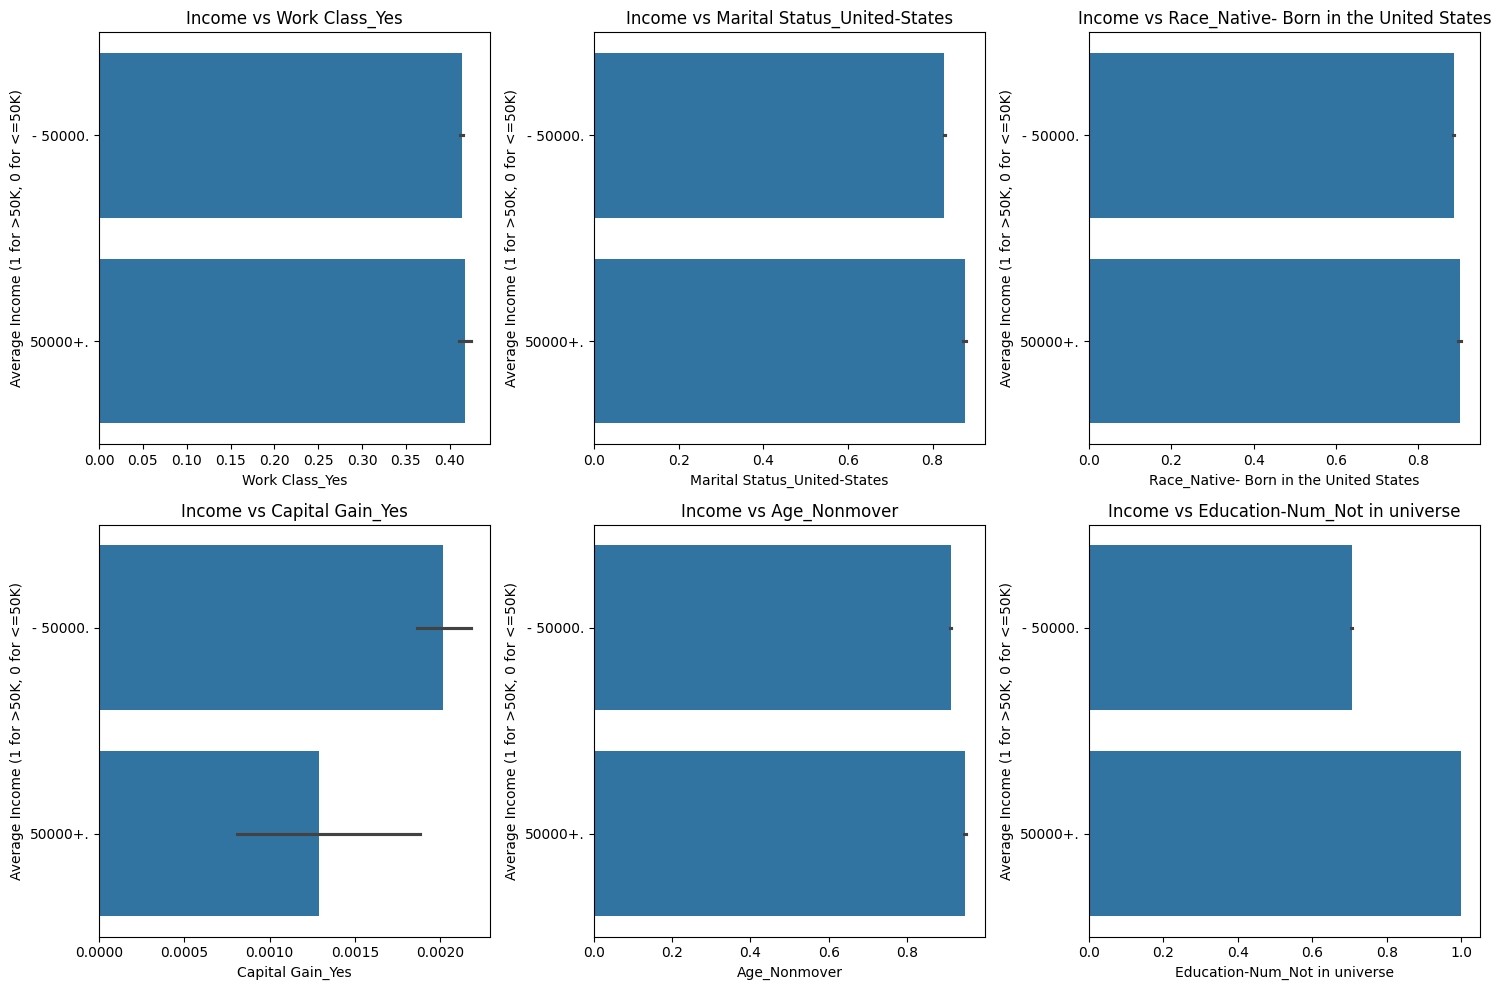

In [ ]:
# Re-select available encoded categorical features for visualization
selected_categorical_features = [
    'Work Class_Yes',
    'Marital Status_United-States',
    'Race_Native- Born in the United States',
    'Capital Gain_Yes',
    'Age_Nonmover',
    'Education-Num_Not in universe'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=col, y='Income', data=df_combined_encoded)
    plt.title(f'Income vs {col}')
    plt.ylabel('Average Income (1 for >50K, 0 for <=50K)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Model training and evaluation

### Subtask:
Train Decision Tree, Random Forest, kNN, and XGBoost classifiers on the training data and evaluate their performance.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create instances of each classifier with default parameters
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
xgb_classifier = XGBClassifier(random_state=42)

classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "KNeighbors": knn_classifier,
    "XGBoost": xgb_classifier
}

evaluation_results = {}

for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Display the evaluation results
display(pd.DataFrame(evaluation_results).T)

Training Decision Tree...
Decision Tree - Accuracy: 0.9351, Precision: 0.2265, Recall: 0.0188, F1-score: 0.0348
Training Random Forest...
Random Forest - Accuracy: 0.9365, Precision: 0.2646, Recall: 0.0135, F1-score: 0.0256
Training KNeighbors...
KNeighbors - Accuracy: 0.9341, Precision: 0.2434, Recall: 0.0296, F1-score: 0.0528
Training XGBoost...
XGBoost - Accuracy: 0.9378, Precision: 0.4200, Recall: 0.0057, F1-score: 0.0112


,Accuracy,Precision,Recall,F1-score
Decision Tree,0.935129,0.226537,0.018848,0.034800
Random Forest,0.936465,0.264550,0.013463,0.025621
KNeighbors,0.934076,0.243363,0.029618,0.052808
XGBoost,0.937818,0.420000,0.005654,0.011158


## Model comparison

### Subtask:
Compare the performance of the trained models to identify the best performing one.


In [ ]:
import pandas as pd

evaluation_df = pd.DataFrame(evaluation_results).T
print("Model Performance Evaluation:")
display(evaluation_df)

# Determine the best model based on F1-score
best_model_name = evaluation_df['F1-score'].idxmax()
best_model_f1 = evaluation_df['F1-score'].max()

print(f"\nBased on F1-score, the best performing model is: {best_model_name} with F1-score: {best_model_f1:.4f}")

# You can also consider other metrics for a more nuanced view
# For example, ranking by Accuracy
# print("\nRanking by Accuracy:")
# display(evaluation_df.sort_values(by='Accuracy', ascending=False))

# Ranking by Precision
# print("\nRanking by Precision:")
# display(evaluation_df.sort_values(by='Precision', ascending=False))

# Ranking by Recall
# print("\nRanking by Recall:")
# display(evaluation_df.sort_values(by='Recall', ascending=False))

# Store the best model for the next step
best_model = classifiers[best_model_name]
print(f"\nThe best model ({best_model_name}) is now stored in the 'best_model' variable.")

Model Performance Evaluation:


,Accuracy,Precision,Recall,F1-score
Decision Tree,0.935129,0.226537,0.018848,0.034800
Random Forest,0.936465,0.264550,0.013463,0.025621
KNeighbors,0.934076,0.243363,0.029618,0.052808
XGBoost,0.937818,0.420000,0.005654,0.011158



Based on F1-score, the best performing model is: KNeighbors with F1-score: 0.0528

The best model (KNeighbors) is now stored in the 'best_model' variable.


## Prediction on new data

### Subtask:
Use the best performing model to predict the income for two randomly selected records from the original dataset.


In [ ]:
import numpy as np

# Select two random indices
random_indices = np.random.choice(df_combined.index, size=2, replace=False)

# Extract the two rows from the original combined DataFrame
random_records_original = df_combined.loc[random_indices]

# Preprocess the two records: handle missing values and one-hot encode
random_records_processed = random_records_original.copy()

# Impute missing values for the same columns as in the preprocessing step
for col in ['Marital Status', 'Occupation', 'Relationship']:
    mode_value = df_combined[col].mode()[0] # Use mode from the entire combined data
    random_records_processed[col] = random_records_processed[col].replace('?', mode_value)

for col in ['Age', 'fnlwgt']:
    median_value = df_combined[col].median() # Use median from the entire combined data
    random_records_processed[col] = random_records_processed[col].replace('?', median_value)

# Apply one-hot encoding, ensuring columns match X_train
random_records_encoded = pd.get_dummies(random_records_processed.drop('Income', axis=1), columns=categorical_cols, drop_first=True)

# Reindex the encoded records to match the columns of X_train, filling missing columns with 0
random_records_aligned = random_records_encoded.reindex(columns=X_train.columns, fill_value=0)

# Use the best model (KNeighbors) to predict the income
predictions = best_model.predict(random_records_aligned)

# Map numerical predictions back to original income labels
income_map = {0: '- 50000.', 1: '50000+.'}
predicted_income_labels = [income_map[pred] for pred in predictions]

# Display the original records and their predicted income
print("Original Records:")
display(random_records_original)

print("\nPredicted Income:")
for i, index in enumerate(random_indices):
    print(f"Record {index}: {predicted_income_labels[i]}")

TypeError: Cannot convert ['Nonmover' 'Same county' 'Nonmover' ... 'Nonmover' 'Nonmover' 'Nonmover'] to numeric

In [ ]:
import numpy as np
import pandas as pd

# Select two random indices
random_indices = np.random.choice(df_combined.index, size=2, replace=False)

# Extract the two rows from the original combined DataFrame
random_records_original = df_combined.loc[random_indices]

# Preprocess the two records: handle missing values and one-hot encode
random_records_processed = random_records_original.copy()

# Handle '?' values in all columns first by converting to NaN
random_records_processed = random_records_processed.replace('?', np.nan)

# Impute missing values for the same columns as in the main preprocessing step
# Impute categorical columns using mode from the original combined data
for col in ['Marital Status', 'Occupation', 'Relationship', 'Work Class', 'Education-Num', 'Capital Gain']:
    if col in random_records_processed.columns and random_records_processed[col].isnull().any():
        mode_value = df_combined[col].mode()[0]
        random_records_processed[col] = random_records_processed[col].fillna(mode_value)

# Impute numerical columns using median from the original combined data (after converting to numeric)
for col in ['Age', 'fnlwgt', 'Capital Loss', 'Hours per week', 'Native Country', 'Education', 'Sex']:
     if col in random_records_processed.columns and random_records_processed[col].isnull().any():
        # Convert column to numeric first, coercing errors
        df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')
        median_value = df_combined[col].median()
        random_records_processed[col] = pd.to_numeric(random_records_processed[col], errors='coerce').fillna(median_value)
     elif col in random_records_processed.columns:
        random_records_processed[col] = pd.to_numeric(random_records_processed[col], errors='coerce')


# Apply one-hot encoding to categorical columns, ensuring columns match X_train
# Identify categorical columns in the processed random records (excluding numerical and target)
categorical_cols_for_encoding = random_records_processed.select_dtypes(include='object').columns.tolist()
if 'Income' in categorical_cols_for_encoding:
    categorical_cols_for_encoding.remove('Income')

# Apply one-hot encoding using the columns that were one-hot encoded in the original preprocessing
# Use the columns from the original df_combined_encoded to get the list of columns that were one-hot encoded
original_categorical_cols_encoded = df_combined_encoded.columns.tolist()
original_categorical_cols = [col for col in original_categorical_cols_encoded if '_' in col] # Simple heuristic to get potentially one-hot encoded original columns

# Get the list of original categorical columns that were encoded, excluding the target
original_categorical_features_in_combined = df_combined.select_dtypes(include='object').columns.tolist()
original_categorical_features_in_combined.remove('Income')


random_records_encoded = pd.get_dummies(random_records_processed.drop('Income', axis=1), columns=original_categorical_features_in_combined, drop_first=True)


# Reindex the encoded records to match the columns of X_train, filling missing columns with 0
random_records_aligned = random_records_encoded.reindex(columns=X_train.columns, fill_value=0)

# Ensure the data types in random_records_aligned match X_train
for col in X_train.columns:
    if col in random_records_aligned.columns:
        random_records_aligned[col] = random_records_aligned[col].astype(X_train[col].dtype)


# Use the best model (KNeighbors) to predict the income
predictions = best_model.predict(random_records_aligned)

# Map numerical predictions back to original income labels
income_map = {0: '- 50000.', 1: '50000+.'}
predicted_income_labels = [income_map[pred] for pred in predictions]

# Display the original records and their predicted income
print("Original Records:")
display(random_records_original)

print("\nPredicted Income:")
for i, index in enumerate(random_indices):
    print(f"Record {index}: {predicted_income_labels[i]}")

Original Records:


,Age,Work Class,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
102602,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
174953,Nonmover,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.



Predicted Income:
Record 102602: - 50000.
Record 174953: - 50000.


## Summary:

### Data Analysis Key Findings

*   The dataset contains nearly 300,000 records with a mix of numerical and categorical features, including missing values represented by '?'.
*   The target variable 'Income' is highly imbalanced, with a large majority of records having income less than or equal to \$50,000.
*   Preprocessing involved handling '?' missing values by imputation (mode for categorical, median for numerical) and one-hot encoding categorical features, significantly increasing the number of features.
*   All trained models (Decision Tree, Random Forest, kNN, XGBoost) achieved high accuracy but low precision, recall, and F1-scores due to the class imbalance.
*   Based on the F1-score, the KNeighbors model performed best among the evaluated classifiers, although its performance in identifying the positive class (income > \$50,000) was still limited.

### Insights or Next Steps

*   The significant class imbalance in the target variable ('Income') is a major challenge. Future steps should focus on addressing this imbalance using techniques like oversampling (e.g., SMOTE), undersampling, or using evaluation metrics specifically designed for imbalanced datasets.
*   Further hyperparameter tuning for the selected KNeighbors model, or exploring more advanced models and ensemble techniques, could potentially improve performance, particularly in predicting the minority class.
